<a href="https://colab.research.google.com/github/addo561/learning-pytorch/blob/main/ComputerVisionII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import  torch
print(torch.__version__)

2.6.0+cu124


#WORKING WITH TENSORS

In [227]:
x  = torch.tensor([False,1,2.0])
x #  changes  all to  float(tensors must  be  of same datatype)

tensor([0., 1., 2.])

In [228]:
#init weight example
x = torch.zeros(3,4)
x,x.shape,x.dtype,type(x)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.Size([3, 4]),
 torch.float32,
 torch.Tensor)

In [229]:
torch.randint(low=0,high=10,size=(3,4))#from 1 to 9

tensor([[0, 8, 5, 3],
        [4, 9, 8, 3],
        [4, 2, 4, 1]])

In [230]:
torch.rand(3,4)#btw 0 and 1

tensor([[0.1642, 0.6212, 0.6378, 0.7740],
        [0.8801, 0.7784, 0.0042, 0.5443],
        [0.8029, 0.4538, 0.2054, 0.9767]])

In [231]:
#normal distribution
torch.randn((3,4))

tensor([[-1.0002, -0.0244,  0.2497, -1.7517],
        [-0.1309,  1.4378, -0.1544, -0.2853],
        [-0.1389, -0.8561, -0.5364, -1.0440]])

In [232]:
import numpy as np
x =  np.array([[10,3,5],[3,3,3]])
y =  torch.tensor(x)
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [233]:
##OPERATION  ON  TENSORS
x = torch.tensor([[2,2,2,2],[3,3,4,4]])
x*10

tensor([[20, 20, 20, 20],
        [30, 30, 40, 40]])

In [234]:
y = x.add(10)
y

tensor([[12, 12, 12, 12],
        [13, 13, 14, 14]])

In [235]:
y1  = y.view(4,2)#change shape to (4,2)
y1

tensor([[12, 12],
        [12, 12],
        [13, 13],
        [14, 14]])

In [236]:
x  = torch.randn(10,1,10)
y  = x.squeeze(1)
x.shape,y.shape

(torch.Size([10, 1, 10]), torch.Size([10, 10]))

In [237]:
z  =  y.unsqueeze(2)
z.shape

torch.Size([10, 10, 1])

In [238]:
x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
z2.shape,z3.shape,z4.shape

(torch.Size([1, 10, 10]), torch.Size([10, 1, 10]), torch.Size([10, 10, 1]))

In [239]:
#matrix multiplication
x =  torch.tensor([[1,2,3,4],[5,6,7,8]])
print(torch.matmul(x,y1))  #or x@y

tensor([[131, 131],
        [335, 335]])


In [240]:
x@y1

tensor([[131, 131],
        [335, 335]])

In [241]:
#concatenate
x = torch.rand(10,10,10)
z  =  torch.cat([x,x],axis=2)
x.shape,z.shape

(torch.Size([10, 10, 10]), torch.Size([10, 10, 20]))

In [242]:
#get max
x  = torch.arange(2,20,2)
x.shape,x.max().item()

(torch.Size([9]), 18)

In [243]:
x.min().item()

2

In [244]:
x.max(dim=0)

torch.return_types.max(
values=tensor(18),
indices=tensor(8))

In [245]:
m,arg = x.max(dim=0)
m,arg

(tensor(18), tensor(8))

In [246]:
m,arg =  x.min(dim=0)
m.item(),arg.item()

(2, 0)

In [247]:
x  = torch.rand(10,4)
x.shape

torch.Size([10, 4])

In [248]:
z  = x.T
z.shape

torch.Size([4, 10])

#AUTO GRADIENTS

In [249]:
x = torch.tensor([[2.,-1.],[1.,1.]],requires_grad=True)
x

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)

In [250]:
out = x.pow(2).sum()

In [251]:
out.backward()#calculate gradient

In [252]:
x.grad#get  gradient

tensor([[ 4., -2.],
        [ 2.,  2.]])

###numpy and pytorch  speed

In [253]:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

In [254]:
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [255]:
x,y = x.to(device),y.to(device)

In [256]:
%timeit z=(x@y)

13.6 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [257]:
x,y = x.cpu(),y.cpu()
%timeit z  =  (x@y)

12.4 ms ± 589 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [258]:
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

31 ms ± 8.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#Neural Networks

In [259]:
x = torch.tensor([[1,2],[3,4],[5,6],[7,8]]).float()
y = torch.tensor([[3],[7],[11],[15]]).float()

In [260]:
x.size(),y.size()

(torch.Size([4, 2]), torch.Size([4, 1]))

In [261]:
import torch.nn as nn

In [262]:
class myNeuralNet(nn.Module):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.input_to_hidden = nn.Linear(2,8)
    self.hidden_activation = nn.ReLU()
    self.hidden_to_output = nn.Linear(8,1)

  def forward(self,x):
    x = self.input_to_hidden(x)
    x = self.hidden_activation(x)
    x  = self.hidden_to_output(x)
    return  x

"""
Alternative

class myNeuralNet(nn.Module):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.input_to_hidden = nn.Parameter(torch.randn(2,8))
    self.hidden_activation = nn.ReLU()
    self.hidden_to_output = nn.Parameter(torch.randn(8,1))

  def forward(self,x):
    x = x @ self.input_to_hidden
    x = self.hidden_activation(x)
    x = x  @ self.hidden_to_output(x)
    return  x
    """

'\nAlternative\n\nclass myNeuralNet(nn.Module):\n  def __init__(self, *args, **kwargs):\n    super().__init__(*args, **kwargs)\n    self.input_to_hidden = nn.Parameter(torch.randn(2,8))\n    self.hidden_activation = nn.ReLU()\n    self.hidden_to_output = nn.Parameter(torch.randn(8,1))\n\n  def forward(self,x):\n    x = x @ self.input_to_hidden\n    x = self.hidden_activation(x)\n    x = x  @ self.hidden_to_output(x)\n    return  x\n    '

In [263]:
torch.manual_seed(42)
myNet =  myNeuralNet()
myNet

myNeuralNet(
  (input_to_hidden): Linear(in_features=2, out_features=8, bias=True)
  (hidden_activation): ReLU()
  (hidden_to_output): Linear(in_features=8, out_features=1, bias=True)
)

In [264]:
myNet.input_to_hidden.weight

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)

In [265]:
myNet.parameters()

<generator object Module.parameters at 0x7b1f40298ac0>

In [266]:
for par in myNet.parameters():
  print(par)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)
Parameter containing:
tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
       requires_grad=True)
Parameter containing:
tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]],
       requires_grad=True)
Parameter containing:
tensor([0.2730], requires_grad=True)


In [267]:
loss = nn.MSELoss()

In [268]:
ytest =  myNet(x)
loss_val = loss(ytest,y)
print(loss_val)

tensor(168.3231, grad_fn=<MseLossBackward0>)


In [269]:
from torch.optim import SGD
opt = SGD(myNet.parameters(),lr=0.001)

In [270]:
loss_h = []
for _ in range(50):
  opt.zero_grad()
  loss_val = loss(myNet(x),y)
  loss_val.backward()
  opt.step()
  loss_h.append(loss_val.item())

In [271]:
loss_h

[168.32308959960938,
 113.79898071289062,
 80.92768859863281,
 57.652198791503906,
 40.15127182006836,
 26.972442626953125,
 17.266122817993164,
 10.55809211730957,
 6.186103820800781,
 3.467700481414795,
 1.874710202217102,
 0.9874542951583862,
 0.5132657885551453,
 0.26785051822662354,
 0.14386454224586487,
 0.08231080323457718,
 0.05211883783340454,
 0.037419646978378296,
 0.030284009873867035,
 0.026809442788362503,
 0.025097690522670746,
 0.024230673909187317,
 0.023767750710248947,
 0.023497600108385086,
 0.02331974171102047,
 0.02318570390343666,
 0.02307296171784401,
 0.02297033742070198,
 0.022872887551784515,
 0.022778093814849854,
 0.02268454059958458,
 0.02259197272360325,
 0.022499902173876762,
 0.022408409044146538,
 0.022317390888929367,
 0.02222665399312973,
 0.02213636040687561,
 0.022046390920877457,
 0.021956900134682655,
 0.021867744624614716,
 0.02177882008254528,
 0.021690383553504944,
 0.02160213142633438,
 0.02151435613632202,
 0.021427026018500328,
 0.021339932

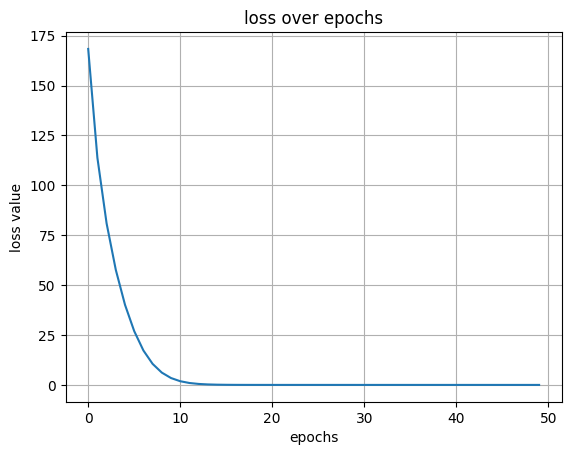

In [272]:
import matplotlib.pyplot as plt
plt.plot(loss_h)
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.show()

###Dataset, DataLoader, and batch size




In [273]:
from torch.utils.data  import Dataset,DataLoader
x  =  [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [274]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()


In [275]:
x=  x.to(device)
y=  y.to(device)

In [276]:
class  myDataset(Dataset):
  def __init__(self,x,y):
    self.x  =  torch.tensor(x).float()
    self.y =  torch.tensor(y).float()
  def __len__(self):
    return len(self.x)
  def __getitem__(self, index):
    return self.x[index],self.y[index]

In [277]:
ds   = myDataset(x,y)

<ipython-input-276-cc17e39cbd79>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x  =  torch.tensor(x).float()
<ipython-input-276-cc17e39cbd79>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y =  torch.tensor(y).float()


In [278]:
dl   = DataLoader(ds,batch_size=2,shuffle=True)

In [279]:
for x,y in  dl:
  print(x,y)

tensor([[1., 2.],
        [3., 4.]]) tensor([[3.],
        [7.]])
tensor([[5., 6.],
        [7., 8.]]) tensor([[11.],
        [15.]])


In [280]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [281]:
mynet = MyNeuralNet().to(device)
loss_func  = nn.MSELoss()
optimizer  = SGD(mynet.parameters(),lr =  0.001)

In [282]:
import time
loss_history =  []
start  = time.time()
for _ in range(50):
  for data  in dl:
    x,y  =  data
    optimizer.zero_grad()
    loss_value = loss_func(mynet(x),y)
    loss_value.backward()
    optimizer.step()
    loss_history.append(loss_value.item())
end = time.time()
print(end -start)


0.08723163604736328


In [283]:
#predict
valx  = [[10,11]]
valx  = torch.tensor(valx).float().to(device)
mynet.eval()
with torch.inference_mode():
  pred  =  mynet(valx)
pred.item()

20.55902671813965

In [284]:
#custom_loss
def mse(y_,y):
  loss = (y_-y)**2
  loss  =  loss.mean()
  return loss

In [285]:
print(loss_func(mynet(x),y))

tensor(0.0128, grad_fn=<MseLossBackward0>)


In [286]:
mse(mynet(x),y)

tensor(0.0128, grad_fn=<MeanBackward0>)

In [287]:
#fetching values of intermedaite layers
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x1 = self.input_to_hidden_layer(x)
        x2= self.hidden_layer_activation(x1)
        x3 = self.hidden_to_output_layer(x2)
        return x3,x2

In [288]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [289]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [291]:
mynet  = MyNeuralNet().to(device)
mynet(X)[1]

tensor([[0.0000, 0.0000, 0.0000, 1.8996, 0.0000, 1.1756, 0.5671, 0.0000],
        [0.0000, 0.1554, 0.0000, 3.3330, 0.0000, 3.0794, 1.8873, 1.1748],
        [0.0000, 0.7753, 0.0000, 4.7664, 0.0000, 4.9831, 3.2075, 2.3523],
        [0.0000, 1.3951, 0.0000, 6.1998, 0.0000, 6.8868, 4.5277, 3.5299]],
       grad_fn=<ReluBackward0>)

#####Using a sequential method to build a neural network


In [294]:
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
).to(device)

In [298]:
from  torchsummary import  summary
summary(model,(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              24
              ReLU-2                    [-1, 8]               0
            Linear-3                    [-1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [299]:
loss_func = nn.MSELoss()
optim  = SGD(model.parameters(),lr=0.001)
loss_history  = []
start =  time.time()
for _ in range(50):
  for x,y in dl:
    optim.zero_grad()
    loss =  loss_func(model(x),y)
    loss.backward()
    optim.step()
    loss_history.append(loss.item())
end = time.time()
print(end -start)

0.08072090148925781


In [306]:
val = [[8,9],[10,11],[1.5,2.5]]
model.eval()
with torch.no_grad():
  pred= model(torch.tensor(val).float().to(device))
print(pred)


tensor([[16.7976],
        [20.6502],
        [ 4.2768]])


In [307]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0472,  0.4925],
                      [-0.3273, -0.0771],
                      [-0.0615, -0.1673],
                      [-0.3585, -0.6303],
                      [-0.5716, -0.3786],
                      [ 1.0922,  0.1342],
                      [-0.4748,  0.1714],
                      [ 0.3989,  0.6189]])),
             ('0.bias',
              tensor([ 0.5565,  0.3938, -0.7011,  0.0627,  0.4283,  0.0011, -0.4167,  0.7016])),
             ('2.weight',
              tensor([[ 0.4159, -0.2013, -0.3187,  0.0158,  0.1567,  0.7973,  0.0699,  0.7113]])),
             ('2.bias', tensor([-0.0962]))])

In [308]:
torch.save(model.state_dict(),'model.pth')

In [311]:
##instantiate  model
model  = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
)

In [312]:
model.load_state_dict(torch.load('model.pth'))
model(torch.tensor(val).float())

tensor([[16.7976],
        [20.6502],
        [ 4.2768]], grad_fn=<AddmmBackward0>)